<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="../images/QWorld.png"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://www.classiq.io/" target="_blank">
            <img src="../images/classiq-logo.svg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->    
    <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
         prepared by Manjula Gandhi
    </td>    
</tr></table>

# Deutsch's Algorithm

First quantum algorithm, to show how quantum circuits can outperform classical ones. The algorithm combines quantum parallelism with a property of quantum mechanics known as interference (the states of an object can add up/cancel out).

# Problem

Given binary function  $ f:[0,1]\rightarrow [0,1]$.  To find whether given f is constant or balanced function.  

Constant Case: $f(0)==f(1)$ 

Balanced Case: $f(0)!=f(1)$

# Constant/Balanced function

The function f can take the following input and output values  

$ f(0)\rightarrow 0$  

$ f(0)\rightarrow 1$  

$ f(1)\rightarrow 0$  

$ f(1)\rightarrow 1$

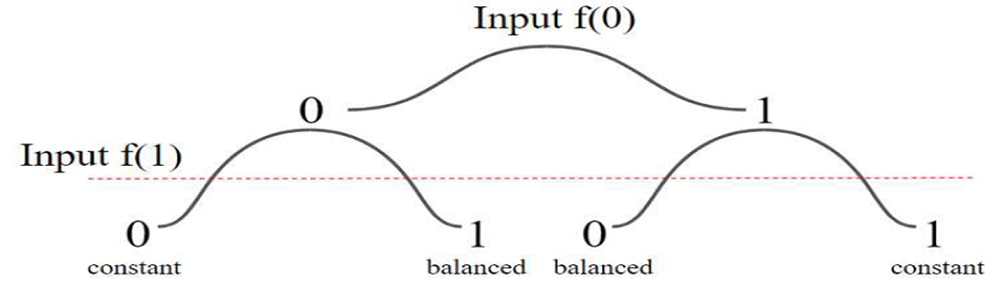

In [5]:
from IPython import display
display.Image("../images/deutsch/Image1.png")

# Classical Solution

Requires two iterations, in iteration 1 we measure f(0) and in iteration 2 we measure f(1)

# Quantum Solution

Will test the two input states simultaneously, i.e.   

Constant Case: $f(0)==f(1)$, output=0

Balanced Case: $f(0)!=f(1)$, output=1

# Quantum Oracle

Function f is implemented via a two qubit "quantum oracle" g, given by

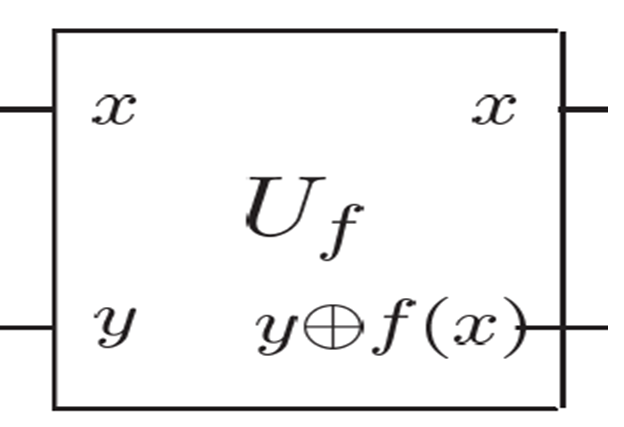

In [7]:
from IPython import display
display.Image("../images/deutsch/Image2.png")

That is, y is flipped iff f(x) is 1.

# Addition modulo 2

$0 \bigoplus 1 = 1$  
$1 \bigoplus 1 = 0$   

Define quantum operation, the oracle g as  
$g|q_1\rangle|q_2\rangle=|q_1\rangle|q_2\bigoplus f(q_1)\rangle$

Example, consider the following case $f(0,1)\rightarrow (0,1)$

$g\frac{1}{\sqrt{2}}\left(|10\rangle+|01\rangle\right) \rightarrow \frac{1}{\sqrt{2}}\left(|11\rangle+|01\rangle\right) $  

$ g |10\rangle=g |1\rangle |0\rangle \rightarrow |1\rangle |0\bigoplus f(1)\rangle=|11\rangle$

Case 1: $ f(0,1)\rightarrow (0,1)$  

$ g|00\rangle=|00\rangle$  
$ g|01\rangle=|01\rangle$  
$ g|10\rangle=|11\rangle$  
$ g|11\rangle=|10\rangle$

Case 2: $ f(0,1)\rightarrow (1,0)$  

$ g|00\rangle=|01\rangle$  
$ g|01\rangle=|00\rangle$  
$ g|10\rangle=|10\rangle$  
$ g|11\rangle=|11\rangle$

Case 3: $ f(0,1)\rightarrow 0$  

$ g|00\rangle=|00\rangle$  
$ g|01\rangle=|01\rangle$  
$ g|10\rangle=|10\rangle$  
$ g|11\rangle=|11\rangle$

Case 4: $ f(0,1)\rightarrow 1$  

$ g|00\rangle=|01\rangle$  
$ g|01\rangle=|00\rangle$  
$ g|10\rangle=|11\rangle$  
$ g|11\rangle=|10\rangle$

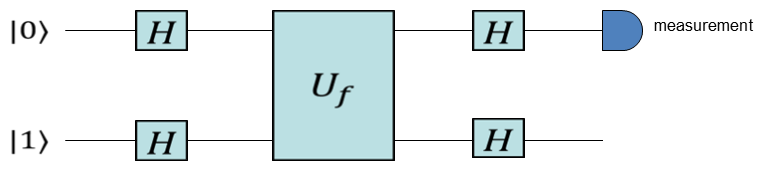

In [8]:
from IPython import display
display.Image("../images/deutsch/circuit2.png")

# Algorithm Steps

Step 1: Qubit 0 is set to 0 and qubit 1 is set to 1, applying hadamard transformation on both q0 and q1. 
     $ |\psi_1>=\frac{1}{2}\left (|00\rangle-|01\rangle+|10\rangle-|11\rangle \right)$ 

Step 2: Applying Oracle g to the input state.

$ f(0,1)\rightarrow (0,1)$  

$ g|\psi\rangle_{in} \rightarrow \frac{1}{2}\left (|00\rangle-|01\rangle-|10\rangle+|11\rangle \right)$  

$ f(0,1)\rightarrow 0 $  

$ g|\psi\rangle_{in} \rightarrow \frac{1}{2}\left (|00\rangle-|01\rangle+|10\rangle-|11\rangle \right)$ 

$ f(0,1)\rightarrow (1,0)$  

$ g|\psi\rangle_{in} \rightarrow \frac{1}{2}\left (-|00\rangle+|01\rangle+|10\rangle-|11\rangle \right)$

$ f(0,1)\rightarrow 1 $  

$ g|\psi\rangle_{in} \rightarrow \frac{1}{2}\left (-|00\rangle+|01\rangle-|10\rangle+|11\rangle \right)$ 

Step 3: Applying Hadamard transformation.

$ H \frac{1}{2}\left (|00\rangle-|01\rangle+|10\rangle-|11\rangle \right)= |01\rangle $

$ f(0,1)\rightarrow (0,1) \hspace{5cm} f(0,1)\rightarrow (1,0)$  

$\hspace{1cm}|11\rangle  \hspace{7cm}-|11\rangle$    


$ f(0,1)\rightarrow 0 \hspace{6cm} f(0,1)\rightarrow 1$  

$\hspace{1cm}|01\rangle  \hspace{7cm}-|01\rangle$


# Interesting Result

The output states for both cases where f is balanced are equal, up to a phase difference.  

And same holds for true for both output states when f is constant.


By measuring the first qubit, we may determine whether the function f is constant or balanced function, using only one evaluation of f(x).
